<a href="https://colab.research.google.com/github/heejvely/Deep_learning/blob/main/%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 신경망을 이루는 가장 중요한 기본 단위: 퍼셉트론(perceptron)
- 퍼셉트론: 입력 값과 활성화 함수를 사용해 출력 값을 다음으로 넘기는 가장 작은 신경망 단위

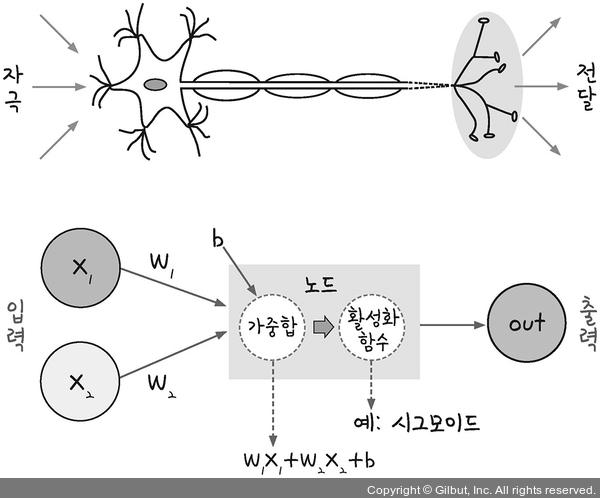

### 가중치, 가중합 바이어스, 활성화 함수

- y = ωx + b(ω는 가중치, b는 바이어스)
- 가중합(weighted sum): 입력값(x)과 가중치(ω)의 곲을 모두 더한 다음 거기에 바이어스(b)를 더한 값
- 활성화함수(activation function): 가중합의 결과를 놓고 1 또는 0을 판단하는 함수

### XOR 문제(exclusive XOR)

- AND: x₁와 x₂ 둘 다 1일 때 결과값이 1로 출력
- OR: 둘 중 하나라도 1이면 1로 출력
- XOR: 둘 중 하나만 1일 때 1로 출력

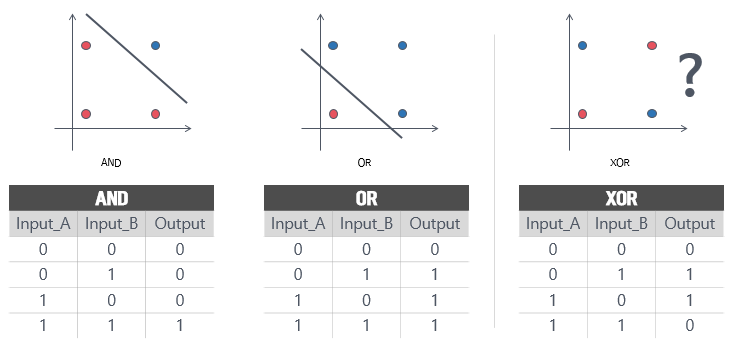

### 다층 퍼셉트론

- XOR 문제를 해결하기 위해서는 두 개의 퍼셉트론을 한 번에 계산할 수 있도록 함. -> 은닉층(hidden layer)를 만듦.
- 은닉층을 만들어 공간을 왜곡하여 두 영역을 가로지르는 선을 직선으로 만듦.

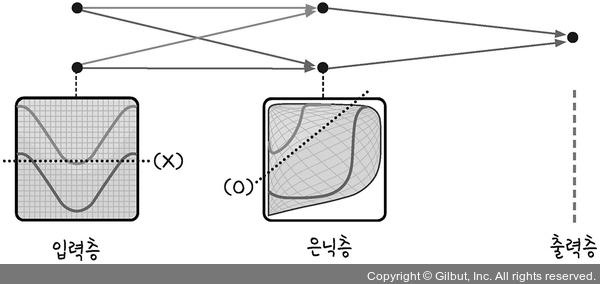

### 다층 퍼셉트론의 설계

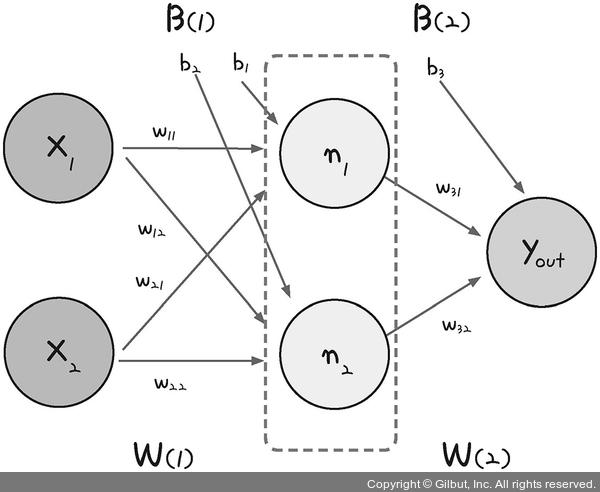

- 가운데 숨어있는 은닉층으로 퍼셉트론이 각각 자신의 가중치(ω)와 바이어스(b) 값을 보내고, 이 은닉층에서 모인 값이 한 번 더 시그모이드 함수(σ)를 이용해 최종값으로 결과를 보냄.

- 은닉층에 모이는 중간 정거장을 노드(node)라고 하며, 여기서는 n₁와 n₂로 표현함.

## n₁ = σ(x₁ω₁₁ + x₂ω₂₁ + b₁)
## n₂ = σ(x₁ω₁₂ + x₂ω₂₂ + b₂)

- 이 두 식의 결괏값이 출력층으로 보내짐. 출력층에서도 시그모이드 함수를 통해 y값이 정해짐.

## y = σ(n₁ω₃₁ + n₂ω₃₂ + b₃)

# 다층 퍼셉트론으로 XOR 문제 해결하기

In [3]:
import numpy as np

# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
  y = np.sum(w * x) + b
  if y <= 0:
    return 0
  else:
    return 1

# NAND 게이트
def NAND(x1, x2):
  return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1, x2):
  return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1, x2):
  return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
  return AND(NAND(x1, x2), OR(x1, x2))

# x1, x2 값을 번갈아 대입하며 최종값 출력
if __name__ == '__main__':
  for x in [(0,0), (1,0), (0,1), (1,1)]:
    y = XOR(x[0], x[1])
    print('입력 값: ' + str(x) + ' 출력 값: ' + str(y))

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0
